<a href="https://colab.research.google.com/github/LQMinh528/AI/blob/main/Mask_Detection_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

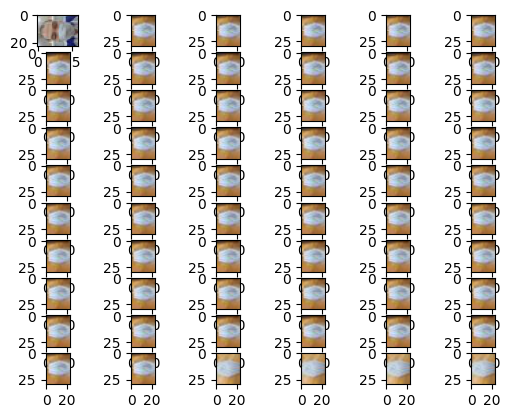

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Mask_Detection_Resized/'

for i in range(60):
  plt.subplot(10,6,i+1)
  filename1 = folder + 'Mask ('+ str(i+1)+').jpg'
  img1 = plt.imread(filename1)
  plt.imshow(img1)
plt.show()

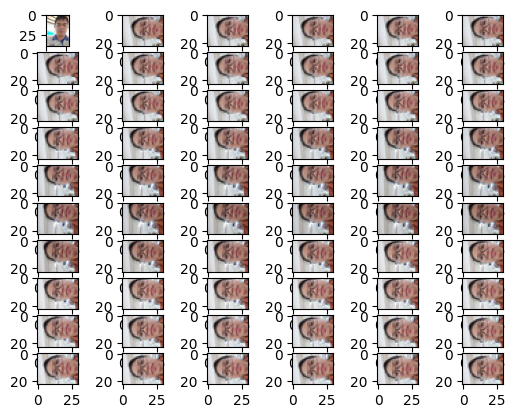

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Mask_Detection_Resized/'

for i in range(60):
  plt.subplot(10,6,i+1)
  filename1 = folder + 'No_Mask ('+ str(i+1)+').jpg'
  img1 = plt.imread(filename1)
  plt.imshow(img1)
plt.show()

In [3]:
from os import listdir 
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/Mask_Detection_Resized/'
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Mask '):
    output = 1 
  if file.startswith('No_Mask '):
    output = 2
  img = load_img(folder + file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/mask_detection_photo.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/mask_detection_label.npy',labels)
plt.show

(2756, 30, 40, 3) (2756,)


<function matplotlib.pyplot.show(close=None, block=None)>

In [4]:
import numpy as np

x_train = np.load('/content/drive/MyDrive/Colab Notebooks/mask_detection_photo.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/mask_detection_label.npy')
print(x_train.shape)
print(y_train.shape)

(2756, 30, 40, 3)
(2756,)


In [5]:
x_train = x_train.astype('float32')/255


In [6]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

y_train = to_categorical(y_train,2756)
model = Sequential()

# tich chap 32 lan
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,40,3),padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 64 lan
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 128 lan
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(2756,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train, batch_size=0,epochs=20,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                    

In [ ]:
model.save('Mask_Detection.h5')

1/1 [==============================] - 0s 385ms/step


'No_Mask'

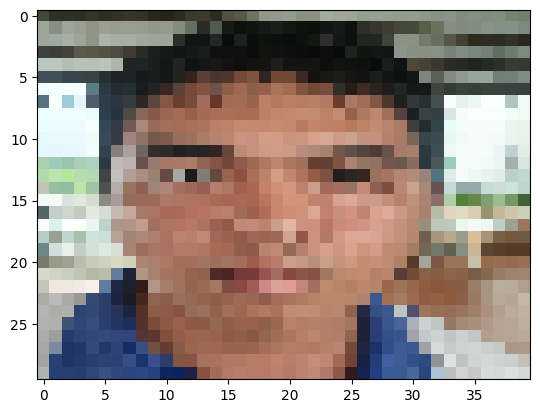

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'Mask',2:'No_Mask'} 
img = load_img("z4361730190487_e40f89d4315857fb86d06de5d0d39d26.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 24ms/step


'Mask'

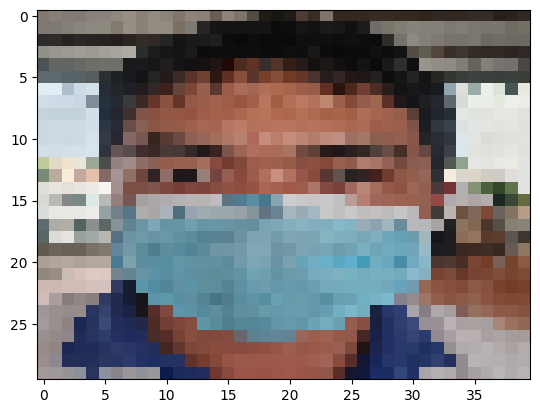

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
ten = {1:'Mask',2:'No_Mask'} 
img = load_img("z4361730265776_ed20e7c23877836473225ac2b27a9188.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]